In [1]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from deepymod.analysis import load_tensorboard
from natsort import natsorted
import os
import pandas as pd

from matplotlib.gridspec import GridSpec


In [146]:
# settings
sns.set(context='paper', style='white')
col_width = 5.5 # neurips style column width in inches
font_size = 10

In [120]:
df = load_tensorboard("runs/sbl_run_0/")

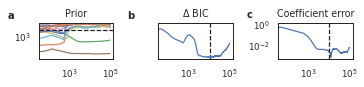

In [165]:
fig = plt.figure(constrained_layout=True, figsize=(0.9 * col_width, 0.2 * col_width))
gs = GridSpec(1, 3, figure=fig)

#Left
ax = fig.add_subplot(gs[0, 0])
ax.plot(df.index, df[prior_keys].ewm(alpha=0.1).mean())
ax.axhline(1e4, color='k', linestyle='--')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Prior')
ax.text(1e-0, 1e6, 'a', fontdict={'weight':'bold', 'size': font_size})


# Middle
ax = fig.add_subplot(gs[0, 1])
ax.axvline(df.BIC.idxmin(), linestyle='--', color='k')
ax.plot(df.index, (df.BIC - df.BIC.min()).ewm(alpha=0.1).mean())
ax.set_xscale('log')
#plt.ylim([0, 1000])
ax.set_title(r"$\Delta$ BIC")
#plt.xlim([0, 50000])
ax.set_yticks([])
ax.text(1e-0, 6.5e3, 'b', fontdict={'weight':'bold', 'size': font_size})


# Right
ax = fig.add_subplot(gs[0, 2])
ax.plot(df.index, masked_coeff_error.ewm(alpha=0.1).mean())
ax.axvline(df.BIC.idxmin(), linestyle='--', color='k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Coefficient error')
#ax.set_xlabel('Epoch', fontdict={'weight':'bold'})
ax.text(1e-0, 5, 'c', fontdict={'weight':'bold', 'size': font_size})

plt.savefig('BIC.pdf', bbox_inches='tight')

In [ ]:

ax.set_ylim([-1.2, 0.3])
ax.set_xticks([0, 5000, 10000])
ax.set_title("Coefficients SBL")
ax.text(-3000.0, 0.25, 'd', fontdict={'weight':'bold', 'size': 12})

Text(0, 0.5, '$\\Delta$ BIC')

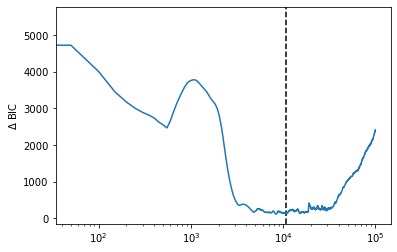

In [117]:
plt.axvline(df.BIC.idxmin(), linestyle='--', color='k')
plt.semilogx(df.index, (df.BIC - df.BIC.min()).ewm(alpha=0.1).mean())
#plt.ylim([0, 1000])
plt.ylabel(r"$\Delta$ BIC")
#plt.xlim([0, 50000])

In [74]:
prior_keys = natsorted(key for key in df.keys() if key.find('alpha') == 0)
coeff_keys = natsorted(key for key in df.keys() if key.find('coeffs') == 0)
masked_coeff_keys = natsorted(key for key in df.keys() if key.find('masked_coeffs') == 0)

In [75]:
true_coeffs = np.zeros((1, 12))
true_coeffs[0, 2] = 0.1
true_coeffs[0, 5] = -1

In [76]:
coeff_error = np.mean(np.abs(df[coeff_keys] - true_coeffs), axis=1)
masked_coeff_error = np.mean(np.abs(df[masked_coeff_keys] - true_coeffs), axis=1)

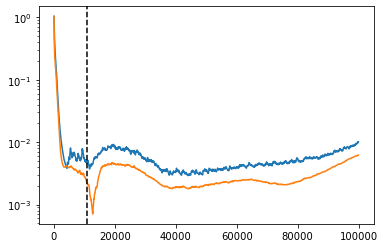

In [77]:
plt.semilogy(df.index, coeff_error.ewm(alpha=0.1).mean())
plt.semilogy(df.index, masked_coeff_error.ewm(alpha=0.1).mean())
plt.axvline(df.BIC.idxmin(), linestyle='--', color='k')

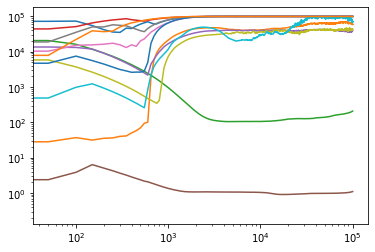

In [115]:
plt.loglog(df.index, df[prior_keys].ewm(alpha=0.1).mean())

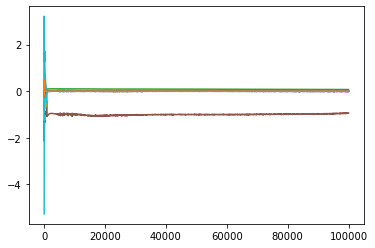

In [66]:
df[coeff_keys].loc[coeff_error.idxmin()]

coeffs_0     0.000421
coeffs_1    -0.003635
coeffs_2     0.087464
coeffs_3     0.000625
coeffs_4    -0.003010
coeffs_5    -1.001250
coeffs_6    -0.000009
coeffs_7     0.000692
coeffs_8    -0.000574
coeffs_9    -0.002718
coeffs_10    0.000583
coeffs_11   -0.000575
Name: 36700, dtype: float64

In [65]:
df[coeff_keys].loc[df.BIC.idxmin()]

coeffs_0     0.000406
coeffs_1     0.001237
coeffs_2     0.095662
coeffs_3    -0.000201
coeffs_4    -0.006624
coeffs_5    -0.992368
coeffs_6     0.002063
coeffs_7    -0.000059
coeffs_8     0.001816
coeffs_9     0.005629
coeffs_10   -0.001038
coeffs_11   -0.000015
Name: 10800, dtype: float64

In [72]:
df[masked_coeffs_keys].loc[df.BIC.idxmin()]

masked_coeffs_0     0.000000
masked_coeffs_1     0.000000
masked_coeffs_2     0.096058
masked_coeffs_3     0.000000
masked_coeffs_4     0.000000
masked_coeffs_5    -0.983903
masked_coeffs_6     0.000000
masked_coeffs_7     0.000000
masked_coeffs_8     0.000000
masked_coeffs_9     0.000000
masked_coeffs_10    0.000000
masked_coeffs_11    0.000000
Name: 10800, dtype: float64

(0.0001, 0.0003)

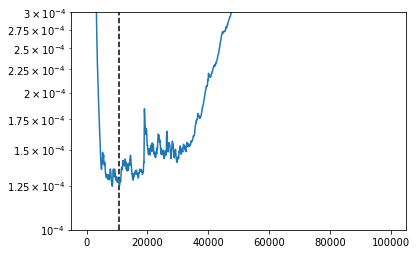

In [36]:
plt.axvline(df.BIC.idxmin(), linestyle='--', color='k')
plt.semilogy(df.index, df.masked_reg.ewm(alpha=0.1).mean())
plt.ylim([1e-4, 3e-4])

In [84]:
n_samples = 1000
log_ll = n_samples * (np.log(df.masked_reg) + np.log(df.mse))

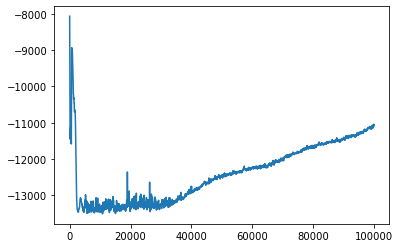

In [85]:
plt.plot(df.index, log_ll)

(-13500.0, -12000.0)

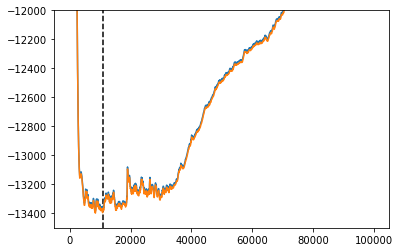

In [87]:
plt.axvline(df.BIC.idxmin(), linestyle='--', color='k')
plt.plot(df.index, df.BIC.ewm(alpha=0.1).mean())
plt.plot(df.index, log_ll.ewm(alpha=0.1).mean())
plt.ylim([-13500, -12000])

In [90]:
n_samples / np.log(n_samples)

144.76482730108395